# Wasting Time

In [1]:
import data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
import seaborn

%matplotlib inline

## Reading and parsing in survey data

In [2]:
columns_needed = ('TUCASEID', 'TRTALONE', 'TRTCHILD', 'TRTFAMILY',
                  'TRTFRIEND', 'TRTSPONLY', 'TRTSPOUSE', 'TRTALONE_WK')
column_names = ('idnum', 'numofchildren', 'numofpeopleinhouse', 'alonetime', 'timewithkids')
df1 = pd.read_table('data/atusresp_2014.dat', sep=',', usecols=columns_needed)
df1 = df1.rename(columns={'TUCASEID':"idnum"})
#df1.head(5)

In [3]:
columns_need = ('TUCASEID', 'TUACTIVITY_N', 'TEWHERE', 'TUACTDUR', 'TRCODE', 'TUTIER1CODE', 
                'TUTIER2CODE',)
df2 = pd.read_table('data/atusact_2014.dat', sep=',', usecols=columns_need)
df2 = df2.rename(columns={'TUACTIVITY_N':"activitycount", 'TEWHERE':'actloc', 
                          'TUACTDUR':'activduration', 'TUCASEID':'idnum'})
#df2.head(5)

In [4]:
columns_nee = ('TUCASEID', 'GEDIV', 'HEFAMINC','HRNUMHOU')
df3 = pd.read_table('data/atuscps_2014.dat', sep=',', usecols=columns_nee)
df3 = df3.rename(columns={'GEDIV': 'Region', 'HEFAMINC': 'family_income',
                        'HRNUMHOU':'num_people_in_household', 'TUCASEID':'idnum'})
#df3.head()

## Merging data into one dataframe based on id number

In [5]:
result = df2.merge(df3, on='idnum', how='left')
result = result.merge(df1, on='idnum', how='left')
result = result.drop_duplicates()
result.index = result.idnum
result = result.drop('idnum', 1)
result = result[(result.TUTIER1CODE < 19)]
result.head()

,activitycount,actloc,activduration,TUTIER1CODE,TUTIER2CODE,TRCODE,Region,family_income,num_people_in_household,TRTALONE,TRTALONE_WK,TRTCHILD,TRTFAMILY,TRTFRIEND,TRTSPONLY,TRTSPOUSE
idnum,,,,,,,,,,,,,,,,
20140101140007,1,-1,540,1,1,10101,8,1,1,0,0,235,235,0,0,0
20140101140007,2,1,30,3,1,30101,8,1,1,0,0,235,235,0,0,0
20140101140007,3,-1,60,1,2,10201,8,1,1,0,0,235,235,0,0,0
20140101140007,4,13,10,18,11,181101,8,1,1,0,0,235,235,0,0,0
20140101140007,5,4,30,11,1,110101,8,1,1,0,0,235,235,0,0,0


## Converting Region code to name

In [6]:
region_code = ['New England', 'Middle Atlantic', 'East North Central', 'West North Central', 
               'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 
               'Pacific']
result.Region = result['Region'].apply(lambda x: region_code[x-1])

## Minutes of work vs Income

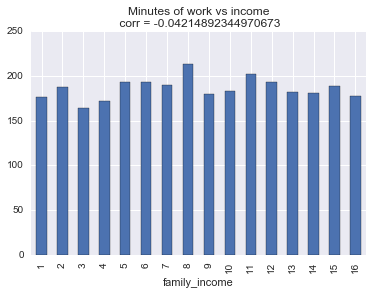

In [7]:
corr = result.family_income.corr(result.activduration)
work_sort = result[(result.TUTIER1CODE == 5)]
work_sort = work_sort.groupby(['family_income']).mean()
(work_sort.activduration).plot.bar(title='Minutes of work vs income\n corr = {}'.format(corr))


## Family Income by Region

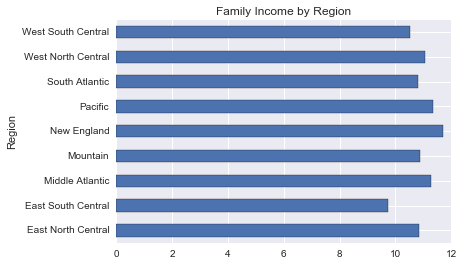

In [8]:
#region_sort = result[(result.TUTIER1CODE == 5)]
region_sort = result.groupby(['Region']).mean()
(region_sort.family_income).plot.barh(title='Family Income by Region')

## Family Income by number of people in household

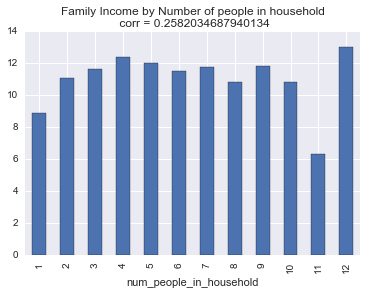

In [9]:
corr = result.family_income.corr(result.num_people_in_household)
num_in_household_sort = result.groupby(['num_people_in_household']).mean()
(num_in_household_sort.family_income).plot.bar(title='Family Income by Number of people in'
                                               ' household\n corr = {}'.format(corr))

## Minutes worked vs number of people in household

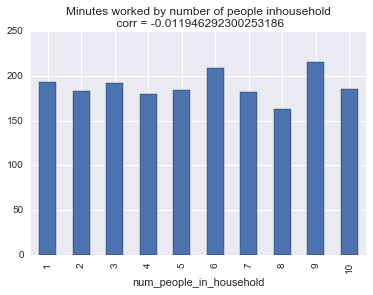

In [10]:
household_work_sort = result[(result.TUTIER1CODE == 5)]
corr = (household_work_sort.activduration).corr(household_work_sort['num_people_in_household'])
household_work_sort = household_work_sort.groupby(['num_people_in_household']).mean()

(household_work_sort.activduration).plot.bar(title='Minutes worked by number of people in'
                                             'household\n corr = {}'.format(corr))

## Sorting DataFrame by Region

In [11]:
grouped_by_region = result[(result.TRTALONE_WK > 0)]
grouped_by_region = result.groupby(['Region']).agg(['count', 'sum', 'mean', 'median', 'std'])
grouped_by_region.head()

activitycount                                     actloc  \
                           count     sum       mean median       std  count   
Region                                                                        
East North Central         35375  416705  11.779647     10  8.252077  35375   
East South Central         13204  150734  11.415783     10  7.888631  13204   
Middle Atlantic            27727  330811  11.931006     10  8.578665  27727   
Mountain                   15838  185455  11.709496     10  8.083757  15838   
New England                10348  124983  12.077986     11  8.495197  10348   

                                                          ...     TRTSPONLY  \
                       sum      mean median       std     ...         count   
Region                                                    ...                 
East North Central  140222  3.963873      1  6.709645     ...         35375   
East South Central   52816  4.000000      1  7.304855     ...         13204   
Middle Atlantic     113044  4.077037      1  7.135652     ...         27727   
Mountain             62765  3.962937      1  6.949176     ...         15838   
New England          40416  3.905682      1  7.161045     ...         10348   

                                                          TRTSPOUSE           \
                        sum       mean median         std     count      sum   
Region                                                                         
East North Central  2991541  84.566530      0  167.974134     35375  5664459   
East South Central  1073662  81.313390      0  167.874332     13204  2126523   
Middle Atlantic     2181260  78.669167      0  158.442218     27727  4298571   
Mountain            1340510  84.638843      0  163.872849     15838  2556193   
New England          999630  96.601276      0  177.273041     10348  1892851   

                                                   
                          mean median         std  
Region                                             
East North Central  160.126049      0  239.355960  
East South Central  161.051424      0  242.516071  
Middle Atlantic     155.031954      0  232.138266  
Mountain            161.396199      0  229.011062  
New England         182.919501      0  248.571837  

[5 rows x 75 columns]

## Average amount of activities per day by Region

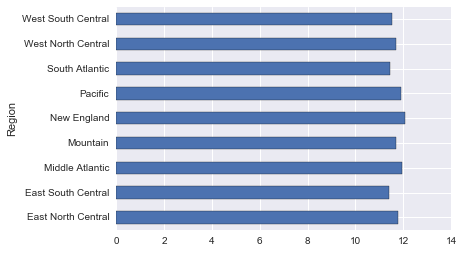

In [12]:
(grouped_by_region['activitycount']['mean']).plot.barh()

## Data Frame sorted by Activity Code

In [13]:
grouped_by_act = result.groupby(['TUTIER1CODE']).agg(['count', 'sum', 'mean', 'median', 'std'])
grouped_by_act = grouped_by_act[:-1]
grouped_by_act.head()

activitycount                                     actloc         \
                    count     sum       mean median       std  count    sum   
TUTIER1CODE                                                                   
1                   42546  451558  10.613407    8.0  9.979576  42546 -39470   
2                   33221  386405  11.631348   10.0  8.120110  33221  52671   
3                   11807  175983  14.904972   14.0  9.783361  11807  63828   
4                    2464   34472  13.990260   12.0  8.166601   2464  28370   
5                    9938   94563   9.515295    8.0  5.688380   9938  23249   

                                             ...     TRTSPONLY           \
                  mean median        std     ...         count      sum   
TUTIER1CODE                                  ...                          
1            -0.927702     -1   0.467277     ...         42546  3524110   
2             1.585473      1   2.725018     ...         33221  3251308   
3             5.405946      1  15.367670     ...         11807   789218   
4            11.513799      3  24.554773     ...          2464   150999   
5             2.339404      2   2.580303     ...          9938   521693   

                                          TRTSPOUSE                       \
                  mean median         std     count      sum        mean   
TUTIER1CODE                                                                
1            82.830583      0  168.329281     42546  6484276  152.406243   
2            97.869059      0  177.481029     33221  5761602  173.432528   
3            66.843229     10  116.775439     11807  2556701  216.541120   
4            61.282062      0  133.383973      2464   318404  129.222403   
5            52.494768      0  103.202104      9938   973752   97.982693   

                                
            median         std  
TUTIER1CODE                     
1                0  236.187247  
2                0  241.406953  
3              140  239.959530  
4                0  226.894815  
5                0  147.416814  

[5 rows x 70 columns]

### Count of each activity

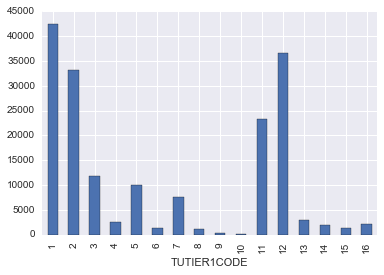

In [14]:
(grouped_by_act.activitycount['count']).plot.bar()

### Average amount of time spend on each activity

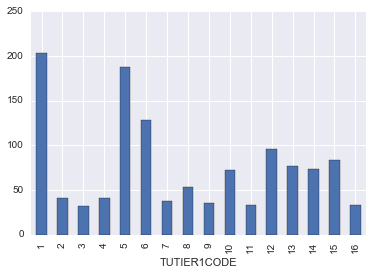

In [15]:
(grouped_by_act.activduration['mean']).plot.bar()

## DataFrame grouped by income

In [16]:
grouped_by_income = result.groupby(['family_income']).agg(['mean', 'sum', 'count', 'median', 
                                                           'std'])
grouped_by_income.head()

activitycount                                  actloc         \
                       mean    sum count median       std      mean    sum   
family_income                                                                
1                 10.254021  49086  4787      9  7.265790  3.641738  17433   
2                 10.488396  30280  2887      9  7.547708  3.560790  10280   
3                 10.916651  58546  5363      9  8.059525  3.443409  18467   
4                 10.741875  74699  6954      9  7.507833  3.275381  22777   
5                 10.838677  63894  5895      9  8.102348  3.519254  20746   

                                         ...      TRTSPONLY                \
              count median       std     ...           mean     sum count   
family_income                            ...                                
1              4787      1  6.473105     ...      39.175266  187532  4787   
2              2887      1  6.877230     ...      48.435054  139832  2887   
3              5363      1  6.388101     ...      36.917397  197988  5363   
4              6954      1  6.231864     ...      37.419758  260217  6954   
5              5895      1  7.249885     ...      58.548940  345146  5895   

                                  TRTSPOUSE                                   
              median         std       mean     sum count median         std  
family_income                                                                 
1                  0  132.427091  75.018383  359113  4787      0  187.525274  
2                  0  148.226559  77.130932  222677  2887      0  192.369278  
3                  0  135.379149  64.020138  343340  5363      0  186.582647  
4                  0  131.067267  60.820679  422947  6954      0  173.664439  
5                  0  158.567294  95.478032  562843  5895      0  210.718017  

[5 rows x 70 columns]

## Average amount of activites by income

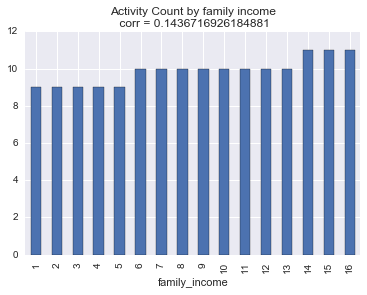

In [17]:
result_agg = result.groupby(result.index).agg(['mean', 'sum', 'count', 'median', 'std'])
corr = (result_agg['family_income']['mean']).corr(result_agg.activitycount['count'])
(grouped_by_income.activitycount['median']).plot.bar(title='Activity Count by family '
                                                     'income\n corr = {}'.format(corr))


## Num of people in household vs Income

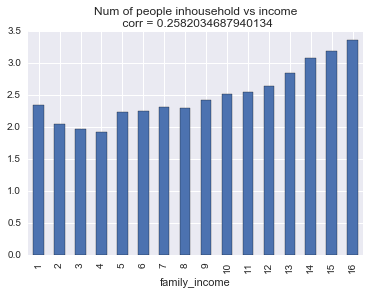

In [18]:
corr = result['family_income'].corr(result['num_people_in_household'])
(grouped_by_income['num_people_in_household']['mean']).plot.bar(title='Num of people in'
                                                                'household vs income\n corr = {}'
                                                                .format(corr))

## Time spent alone vs income

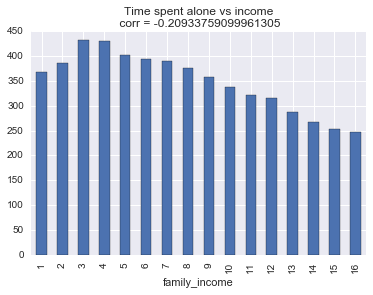

In [19]:
corr = result['family_income'].corr(result['TRTALONE'])
(grouped_by_income['TRTALONE']['mean']).plot.bar(title='Time spent alone vs income\n corr = {}'
                                                 .format(corr))

## Time spent with kids vs Income

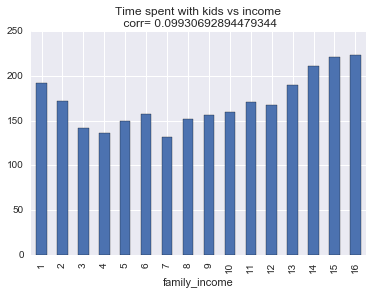

In [20]:
corr = result['family_income'].corr(result['TRTCHILD'])
(grouped_by_income['TRTCHILD']['mean']).plot.bar(title='Time spent with kids vs income\n corr'
                                                 '= {}'.format(corr))

## Time spent with family vs Income

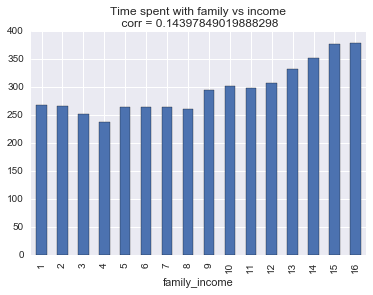

In [21]:
corr = result['family_income'].corr(result['TRTFAMILY'])
(grouped_by_income['TRTFAMILY']['mean']).plot.bar(title='Time spent with family vs '
                                                  'income\n corr = {}'.format(corr))

## Time spent with only spouse vs Income

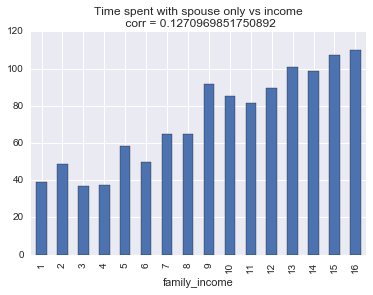

In [22]:
corr = result['family_income'].corr(result['TRTSPONLY'])
(grouped_by_income['TRTSPONLY']['mean']).plot.bar(title='Time spent with spouse'
                                                  ' only vs income\n corr = {}'.format(corr))

## Timespent with Spouse in group setting vs Income

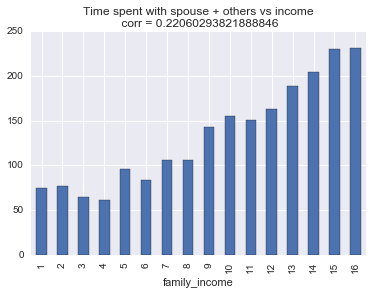

In [23]:
corr = result['family_income'].corr(result['TRTSPOUSE'])
(grouped_by_income['TRTSPOUSE']['mean']).plot.bar(title='Time spent with spouse + '
                                                'others vs income\n corr = {}'.format(corr))